# Data Challenge 1 - Breast Cancer Awareness

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

## Project Summary

**1. Investigation Overview**: This project requires the analysis of data from biopsied breast cells to help doctors diagnose breast cancer. The task is to develop a model to predict which cells are malignant or benign and answer questions about which cell features are most important for the prediction.

Answers to these questions will help doctors order the number of tests required to make an accurate prediction.

**2. Hypothesis**: A subset of the features included in the dataset can be used to make a more or just as accurate prediction.

**3. Findings**: 'Uniformity of Cell Size','Bare Nuclei','Uniformity of Cell Shape','Bland Chromatin', and 'Single Epithelial Cell Size' were found to be the most important features for classification of the cells. These features appear to be the largest drivers of malignancy. By only using them in a Random Forest Classifier, I was able to maximize recall.

**4. Recommendations**: Physicians should focus their time/money on collecting data on the 'Uniformity of Cell Size','Bare Nuclei','Uniformity of Cell Shape','Bland Chromatin', and 'Single Epithelial Cell Size'. These features are the most predictive for determining whether a cell is malignant of benign. 

## 1. Load the Data

In [2]:
df = pd.read_csv('breast_cancer_wisconsin.txt',sep=',',header=0).drop(columns=['Index'])
print('# of Features = ' + str(df.shape[1]))
print('# of Cases = ' + str(df.shape[0]))
df.head()

# of Features = 11
# of Cases = 15855


,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4


## 2. Data Cleaning

### Data Types

In [3]:
# Look at data types and # of entries for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 11 columns):
ID                             15855 non-null int64
Clump Thickness                15855 non-null int64
Uniformity of Cell Size        15827 non-null object
Uniformity of Cell Shape       15827 non-null object
Marginal Adhesion              15827 non-null object
Single Epithelial Cell Size    15827 non-null object
Bare Nuclei                    15827 non-null object
Bland Chromatin                15827 non-null object
Normal Nucleoli                15827 non-null object
Mitoses                        15827 non-null object
Class                          15827 non-null object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [4]:
# Check the type of data contained in the columns from "Uniformity of Cell Size" to "Class".
type(df['Marginal Adhesion'].values[10])

str

**Comment**: It looks like most of the columns are stored as objects with the values listed as strings. These values (contained in columns from "Uniformity of Cell Size" to "Class") will need to be changed to integers for this analysis.

### Missing Values

In [5]:
# Check for missing values and count their number. There are 28 rows with NaN values in the last 9 columns.
df.isnull().sum()

ID                              0
Clump Thickness                 0
Uniformity of Cell Size        28
Uniformity of Cell Shape       28
Marginal Adhesion              28
Single Epithelial Cell Size    28
Bare Nuclei                    28
Bland Chromatin                28
Normal Nucleoli                28
Mitoses                        28
Class                          28
dtype: int64

In [6]:
# Show the rows in the dataframe with NaN to see if values are missing across the individual case.
print('# of rows = ' + str(df[df.isnull().any(axis=1)].shape[0]))
df[df.isnull().any(axis=1)]

# of rows = 28


,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
355,1111249,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,1111249,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1188,601265,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,1241035,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3981,691628,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4104,1112209,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4460,1198641,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4788,1169049,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4903,1200892,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5340,1111249,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comment**: The NaN rows occur for every variable in a case except for 'Clump Thickness'. The data here lacks a lot of information, even the final diagnosis of the tumor. Therefore, these rows will be removed from the dataset to ensure all cases have input and predictor values.

### Cleaning the Data of NaNs and Other Values

In [7]:
# Remove the NaN rows from the dataframe. Change the rowsCheck to make sure they are removed.

df_no_na = df.dropna()
print('# of Features = ' + str(df_no_na.shape[1]))
print('# of Cases = ' + str(df_no_na.shape[0]))
df_no_na.info()

# of Features = 11
# of Cases = 15827
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15827 entries, 0 to 15854
Data columns (total 11 columns):
ID                             15827 non-null int64
Clump Thickness                15827 non-null int64
Uniformity of Cell Size        15827 non-null object
Uniformity of Cell Shape       15827 non-null object
Marginal Adhesion              15827 non-null object
Single Epithelial Cell Size    15827 non-null object
Bare Nuclei                    15827 non-null object
Bland Chromatin                15827 non-null object
Normal Nucleoli                15827 non-null object
Mitoses                        15827 non-null object
Class                          15827 non-null object
dtypes: int64(2), object(9)
memory usage: 1.4+ MB


In [8]:
# Check for unique values in each row to see if other string values remaining.
# Other values in the data include "#","No idea", and "?".

for i in range(2,11,1):
    column = df_no_na.iloc[:,i]
    print(column.unique())

['8' '10' '6' '5' '4' '9' '3' '1' 'No idea' '2' '7' '50' '100' '30' '#'
 '?' '80' '40' '60' '90' '20']
['3' '5' '4' '6' '10' '7' '1' 'No idea' '2' '60' '100' '40' '#' '9' '8'
 '?' '30' '50' '70']
['7' '5' '10' '3' '6' '4' '1' '2' 'No idea' '30' '40' '#' '8' '?' '70'
 '60' '100' '50' '9' '20']
['4' '10' '3' '6' '2' '8' 'No idea' '1' '30' '5' '#' '?' '40' '20' '7'
 '60' '80' '100' '9']
['5' '10' '1' '8' '2' '3' '6' 'No idea' '?' '80' '60' '30' '100' '#' '9'
 '50' '7' '4' '20']
['7' '6' '3' '2' '4' 'No idea' '1' '5' '70' '30' '40' '#' '10' '8' '?'
 '20' '9' '60' '50']
['8' '10' '5' '4' '3' '7' '2' '6' '9' '1' 'No idea' '40' '90' '20' '30'
 '#' '?' '80' '60' '50' '100' '70']
['2' '1' '7' 'No idea' '3' '10' '70' '8' '20' '#' '6' '?' '4' '5']
['4' '2' 'No idea' '40' '#' '?' '20']


In [9]:
# Find rows where 'No idea','?', or '#' values are located.

filter_no_idea = df_no_na['Uniformity of Cell Size'] == 'No idea'
filter_question = df_no_na['Uniformity of Cell Size'] == '?'
filter_num = df_no_na['Uniformity of Cell Size'] == '#'
df_no_na[filter_no_idea|filter_question|filter_num]

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
30,1226612,7,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea
70,1076352,3,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea
396,1111249,10,#,#,#,#,#,#,#,#,#
721,1110524,10,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea
1143,1198641,10,?,?,?,?,?,?,?,?,?
1179,1198641,10,#,#,#,#,#,#,#,#,#
2226,1106829,7,#,#,#,#,#,#,#,#,#
2239,378275,10,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea
2534,1106829,7,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea
2856,691628,8,?,?,?,?,?,?,?,?,?


**Comment**: The "No idea", "?", and "#" values are located in all columns except "Clump Thickness". Therefore, I am going to remove these rows from the dataframe.

In [10]:
# Filter out the rows with "No idea", "?", or "#" in them. Print out first five rows.
df_clean = df_no_na[~(filter_no_idea|filter_question|filter_num)]
df_clean.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4


In [11]:
# Check to make sure all character values are removed.
for i in range(1,11,1):
    column = df_clean.iloc[:,i]
    print(column.unique())

[  7   6   8   5  10   3   4   1  70  80 100   2   9  50  30  40  60]
['8' '10' '6' '5' '4' '9' '3' '1' '2' '7' '50' '100' '30' '80' '40' '60'
 '90' '20']
['3' '5' '4' '6' '10' '7' '1' '2' '60' '100' '40' '9' '8' '30' '50' '70']
['7' '5' '10' '3' '6' '4' '1' '2' '30' '40' '8' '70' '60' '100' '50' '9'
 '20']
['4' '10' '3' '6' '2' '8' '1' '30' '5' '40' '20' '7' '60' '80' '100' '9']
['5' '10' '1' '8' '2' '3' '6' '?' '80' '60' '30' '100' '9' '50' '7' '4'
 '20']
['7' '6' '3' '2' '4' '1' '5' '70' '30' '40' '10' '8' '20' '9' '60' '50']
['8' '10' '5' '4' '3' '7' '2' '6' '9' '1' '40' '90' '20' '30' '80' '60'
 '50' '100' '70']
['2' '1' '7' '3' '10' '70' '8' '20' '6' '4' '5']
['4' '2' '40' '20']


In [12]:
# Check rows where "?" shows up in the "Bare Nuclei" column. 
last_question_filter = df_clean['Bare Nuclei'] == '?'
df_clean[last_question_filter]

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
157,1057067,1,1,1,1,1,?,1,1,1,2
1144,1238464,1,1,1,1,1,?,2,1,1,2
1799,169356,3,1,1,1,2,?,3,1,1,2
2398,563649,8,8,8,1,2,?,6,10,1,4
3727,61634,5,4,3,1,2,?,2,3,1,2
5059,1096800,6,6,6,9,6,?,7,8,1,2
6563,1241232,3,1,4,1,2,?,3,1,1,2
6752,1193683,1,1,2,1,3,?,1,1,1,2
7122,432809,3,1,3,1,2,?,2,1,1,2
7539,1184840,1,1,3,1,2,?,2,1,1,2


In [13]:
# Replace the "?" values with 0 since I cannot determine a suitable value for it from the data. I also don't want to
# lose the other values in the dataset.

df_clean = df_clean.replace("?",0)

### Changing Values in Columns 2-10 into Ints Instead of Strings

In [14]:
# Change the Columns 2 - 10 into Ints instead of Strings.
for i in range(2,11,1):
    column = df_clean.columns[i]
    df_clean[column] = df_clean[column].astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15776 entries, 0 to 15854
Data columns (total 11 columns):
ID                             15776 non-null int64
Clump Thickness                15776 non-null int64
Uniformity of Cell Size        15776 non-null int64
Uniformity of Cell Shape       15776 non-null int64
Marginal Adhesion              15776 non-null int64
Single Epithelial Cell Size    15776 non-null int64
Bare Nuclei                    15776 non-null int64
Bland Chromatin                15776 non-null int64
Normal Nucleoli                15776 non-null int64
Mitoses                        15776 non-null int64
Class                          15776 non-null int64
dtypes: int64(11)
memory usage: 1.4 MB


In [34]:
# Drop the duplicate columns with the same ID number.
df_deduped = df_clean[~df_clean['ID'].duplicated()]
print(df_deduped.shape)
df_deduped.head()

(665, 11)


,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1241035,7.0,8.0,3.0,7.0,4.0,5.0,7.0,8.0,2.0,4.0
1,1107684,6.0,10.0,5.0,5.0,4.0,10.0,6.0,10.0,1.0,4.0
2,691628,8.0,6.0,4.0,10.0,10.0,1.0,3.0,5.0,1.0,4.0
3,1226612,7.0,5.0,6.0,3.0,3.0,8.0,7.0,4.0,1.0,4.0
4,1142706,5.0,10.0,10.0,10.0,6.0,10.0,6.0,5.0,2.0,4.0


## 3. Exploratory Data Analysis

In [53]:
# See spread of data values.
df_deduped.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.650000e+02,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,1.387219e+06,4.586466,3.336842,3.400000,3.006015,3.291729,3.708271,3.541353,3.085714,1.845113,2.754887
std,1.859577e+06,2.867894,3.134185,3.027882,2.977318,2.227094,3.726615,2.452904,3.173714,2.177737,0.970224
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,8.881690e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.174131e+06,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.241679e+06,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,5.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [54]:
# Data ranges should be between 1 - 10, but it looks like there may be a few values above 10 than need to be fixed.
# Change the values to the acceptable range using the apply/lambda function.

for i in range(1,11,1):
    column = df_deduped.columns[i]
    df_deduped[column] = df_deduped[column].apply(lambda x: x/10 if x > 10 else x)
df_deduped.describe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.650000e+02,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,1.387219e+06,4.586466,3.336842,3.400000,3.006015,3.291729,3.708271,3.541353,3.085714,1.845113,2.754887
std,1.859577e+06,2.867894,3.134185,3.027882,2.977318,2.227094,3.726615,2.452904,3.173714,2.177737,0.970224
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,8.881690e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.174131e+06,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.241679e+06,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,5.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [55]:
# Look at imbalance. There are ~2x more benign cases than malignant.
df_deduped.groupby('Class').size()

Class
2.0    414
4.0    251
dtype: int64

In [56]:
# Look at the correlations between variables in the data. "Clump Thickness", "Uniformity of Cell Size", and
# "Uniformity of Cell Shape" are most correlated with the "Class"

df_deduped.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('seismic'), axis=1)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
ID,1.0,0.1107,0.1721,0.158,0.1579,0.001312,0.1501,0.05399,0.1793,0.4835,0.09477
Clump Thickness,0.1107,1.0,0.6346,0.6457,0.4788,0.5018,0.5886,0.5438,0.5238,0.3519,0.7207
Uniformity of Cell Size,0.1721,0.6346,1.0,0.8977,0.701,0.7139,0.677,0.7381,0.7202,0.4437,0.7948
Uniformity of Cell Shape,0.158,0.6457,0.8977,1.0,0.6837,0.6775,0.6956,0.7138,0.7112,0.431,0.785
Marginal Adhesion,0.1579,0.4788,0.701,0.6837,1.0,0.5791,0.6665,0.6347,0.5839,0.4264,0.6804
Single Epithelial Cell Size,0.001312,0.5018,0.7139,0.6775,0.5791,1.0,0.5534,0.6007,0.599,0.3891,0.666
Bare Nuclei,0.1501,0.5886,0.677,0.6956,0.6665,0.5534,1.0,0.6559,0.5635,0.3611,0.7966
Bland Chromatin,0.05399,0.5438,0.7381,0.7138,0.6347,0.6007,0.6559,1.0,0.6497,0.3016,0.7393
Normal Nucleoli,0.1793,0.5238,0.7202,0.7112,0.5839,0.599,0.5635,0.6497,1.0,0.4388,0.6872
Mitoses,0.4835,0.3519,0.4437,0.431,0.4264,0.3891,0.3611,0.3016,0.4388,1.0,0.3961


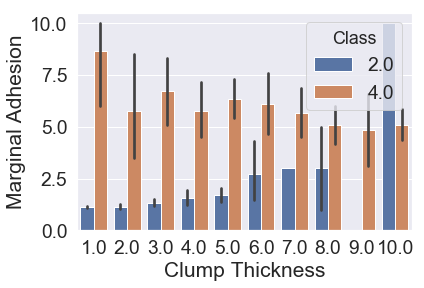

In [57]:
sns.barplot(x='Clump Thickness',y='Marginal Adhesion',hue='Class',data=df_deduped)

### 4. ML Modeling

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df_ML = df_deduped.drop(columns=['ID'])

X_train, X_test, y_train, y_test = train_test_split(df_ML.iloc[:,0:-1],\
                                                        df_ML['Class'],test_size=0.2)

print('X_train shape = ' + str(X_train.shape))
print('y_train shape = ' + str(y_train.shape))
print('X_test shape = ' + str(X_test.shape))
print('y_test shape = ' + str(y_test.shape))

X_train shape = (532, 9)
y_train shape = (532,)
X_test shape = (133, 9)
y_test shape = (133,)


In [59]:
LR = LogisticRegression() # Logistic regression
RF = RandomForestClassifier(n_estimators = 200) # Random Forest classification

LR.fit(X_train,y_train)
RF.fit(X_train,y_train)

predict_LR = LR.predict(X_test) # Test the models on the testing set.
predict_RF= RF.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_RF))
CM_check = confusion_matrix(y_test,np.asarray(predict_RF))
CM_check

              precision    recall  f1-score   support

         2.0       0.98      0.95      0.96        86
         4.0       0.92      0.96      0.94        47

   micro avg       0.95      0.95      0.95       133
   macro avg       0.95      0.96      0.95       133
weighted avg       0.96      0.95      0.96       133



array([[82,  4],
       [ 2, 45]])

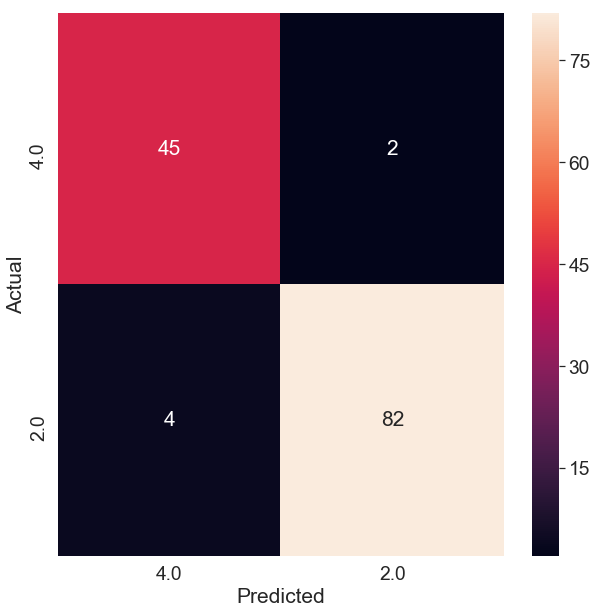

In [61]:
conf_mat = confusion_matrix(y_test, predict_RF,labels=df_clean['Class'].unique())
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='d',xticklabels=df_clean['Class'].unique(), yticklabels=df_clean['Class'].unique())
sns.set(font_scale=1.75)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [62]:
print(classification_report(y_test,predict_LR))
CM_check_LR = confusion_matrix(y_test,np.asarray(predict_LR))
CM_check_LR

              precision    recall  f1-score   support

         2.0       0.93      0.95      0.94        86
         4.0       0.91      0.87      0.89        47

   micro avg       0.92      0.92      0.92       133
   macro avg       0.92      0.91      0.92       133
weighted avg       0.92      0.92      0.92       133



array([[82,  4],
       [ 6, 41]])

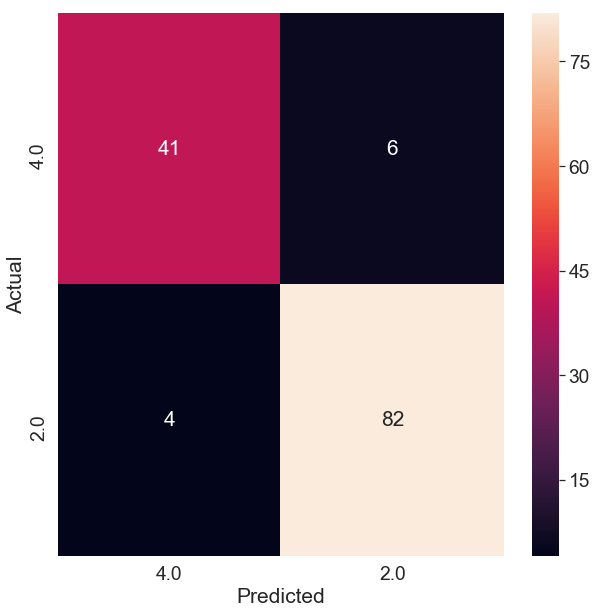

In [63]:
conf_mat = confusion_matrix(y_test, predict_LR,labels=df_clean['Class'].unique())
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='d',xticklabels=df_clean['Class'].unique(), yticklabels=df_clean['Class'].unique())
sns.set(font_scale=1.75)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

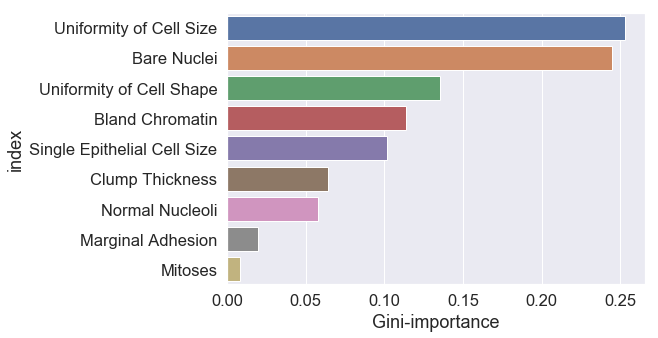

In [64]:
# Graph the most important features in the Random Forest model.


feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, RF.feature_importances_):
    feats[feature] = importance #add the name/value pair 
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(7.5,5))
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'}).\
sort_values('Gini-importance',ascending=False).reset_index().head(10)
sns.barplot(x='Gini-importance',y='index',data=importances)

## 5. Model Tuning and Feature Selection

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df_ML_tune = df_deduped[['Uniformity of Cell Size','Bare Nuclei','Uniformity of Cell Shape','Bland Chromatin',\
                       'Single Epithelial Cell Size','Class']]

X_train, X_test, y_train, y_test = train_test_split(df_ML_tune.iloc[:,0:-1],\
                                                        df_ML_tune['Class'],test_size=0.2)

print('X_train shape = ' + str(X_train.shape))
print('y_train shape = ' + str(y_train.shape))
print('X_test shape = ' + str(X_test.shape))
print('y_test shape = ' + str(y_test.shape))

X_train shape = (532, 5)
y_train shape = (532,)
X_test shape = (133, 5)
y_test shape = (133,)


In [67]:
LR = LogisticRegression() # Logistic regression
RF = RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=10,\
                                 max_features = 'auto',bootstrap=True) # Random Forest classification

LR.fit(X_train,y_train)
RF.fit(X_train,y_train)

predict_LR = LR.predict(X_test) # Test the models on the testing set.
predict_RF= RF.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
print(classification_report(y_test,predict_RF))
CM_check = confusion_matrix(y_test,np.asarray(predict_RF))
CM_check

              precision    recall  f1-score   support

         2.0       0.98      0.95      0.96        84
         4.0       0.92      0.96      0.94        49

   micro avg       0.95      0.95      0.95       133
   macro avg       0.95      0.96      0.95       133
weighted avg       0.96      0.95      0.96       133



array([[80,  4],
       [ 2, 47]])

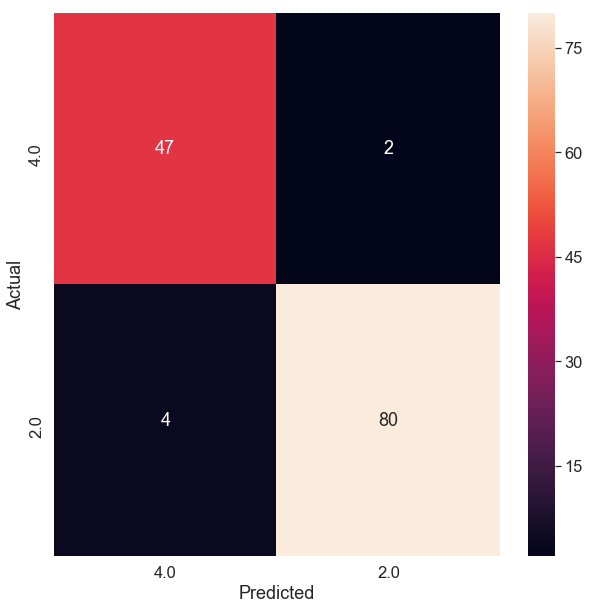

In [69]:
conf_mat = confusion_matrix(y_test, predict_RF,labels=df_clean['Class'].unique())
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='d',xticklabels=df_clean['Class'].unique(), yticklabels=df_clean['Class'].unique())
sns.set(font_scale=1.75)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [70]:
print(classification_report(y_test,predict_LR))
CM_check_LR = confusion_matrix(y_test,np.asarray(predict_LR))
CM_check_LR

              precision    recall  f1-score   support

         2.0       0.95      0.96      0.96        84
         4.0       0.94      0.92      0.93        49

   micro avg       0.95      0.95      0.95       133
   macro avg       0.95      0.94      0.94       133
weighted avg       0.95      0.95      0.95       133



array([[81,  3],
       [ 4, 45]])

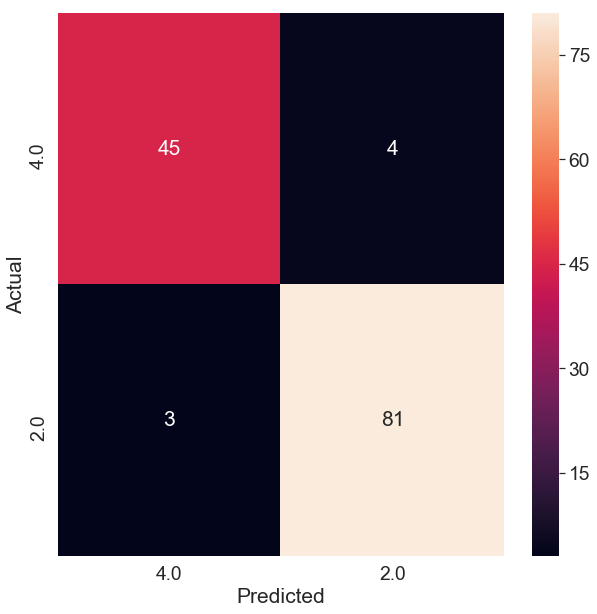

In [71]:
conf_mat = confusion_matrix(y_test, predict_LR,labels=df_clean['Class'].unique())
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='d',xticklabels=df_clean['Class'].unique(), yticklabels=df_clean['Class'].unique())
sns.set(font_scale=1.75)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()